11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 51s 115ms/step - accuracy: 0.7658 - loss: 0.7824 - val_accuracy: 0.9761 - val_loss: 0.0919
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.9624 - loss: 0.1223 - val_accuracy: 0.9820 - val_loss: 0.0636
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 95ms/step - accuracy: 0.9737 - loss: 0.0857 - val_accuracy: 0.9844 - val_loss: 0.0551
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.9781 - loss: 0.0722 - val_accuracy: 0.9862 - val_loss: 0.0490
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9795 - loss: 0.0656 - val_accuracy: 0.9855 - val_loss: 0.0463
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 95ms/step - accuracy: 0.9825 - loss: 0.0564 - val_accuracy: 0.9880 - val_loss: 0.0398
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9832 - loss: 0.0540 - val_accuracy: 0.9888 - val_loss: 0.0385
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━

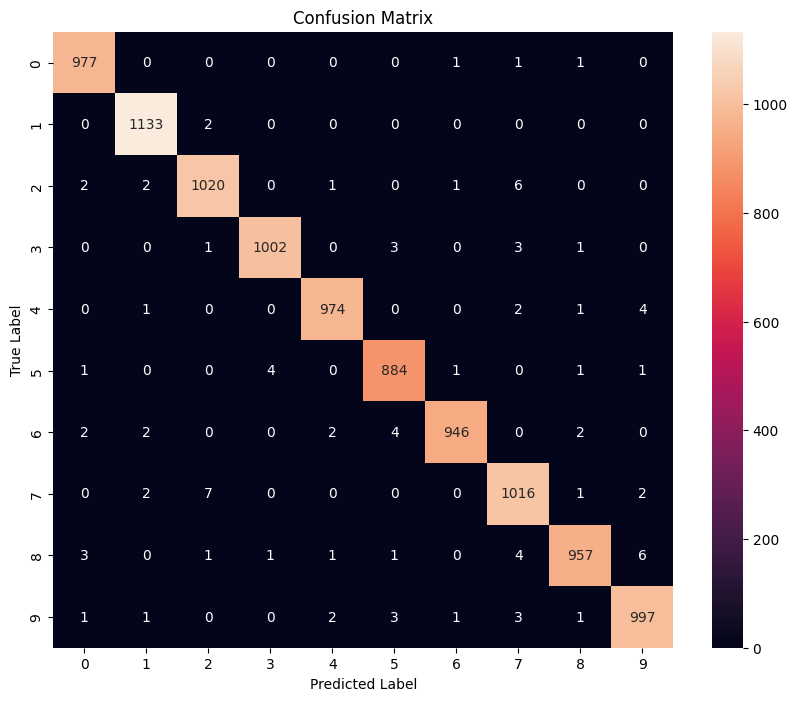

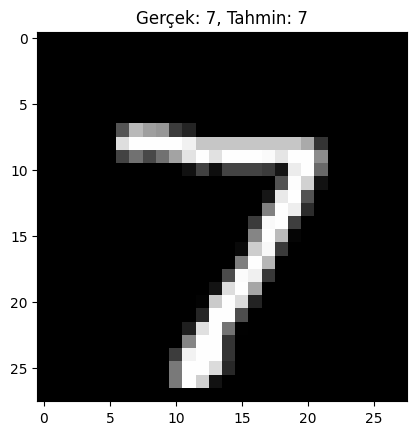

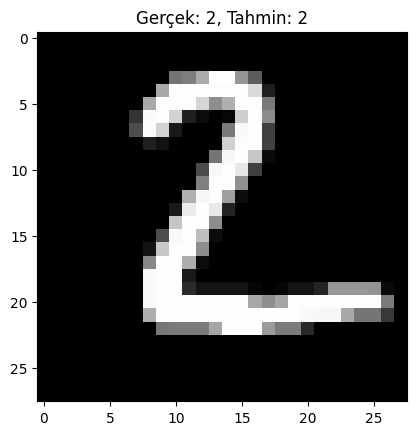

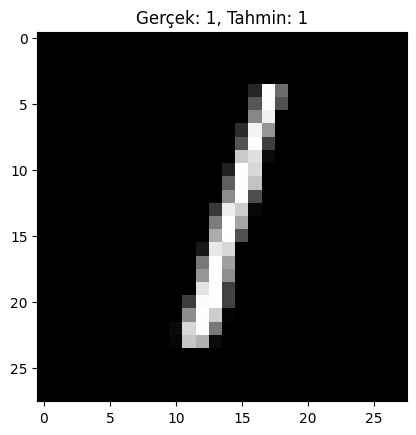

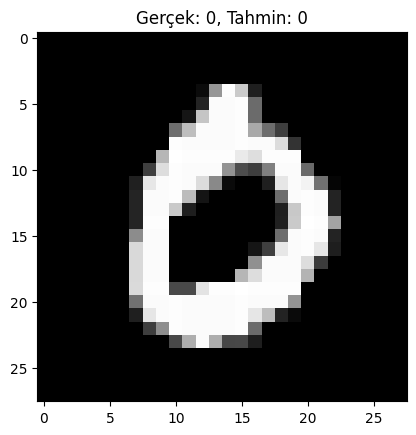

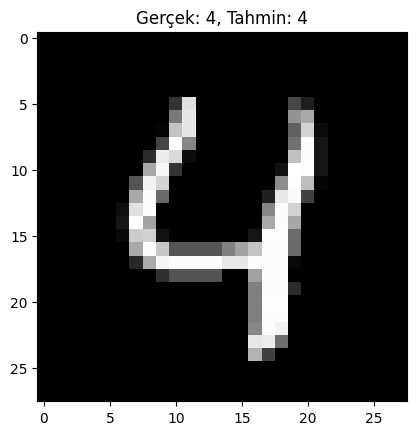

In [1]:
# prompt: MNIST verisetini kullanarak bir custom CNN yapısı oluştur, verileri yükle, veriyi normalize et, train ve test olarak ayır, CNN modelini eğit, test veri seti için accuracy değerini göster, confusion matrix oluştur. örnek sınıflandırma sonuçlarını (hatalı ve doğru) göster

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Veri setini yükle
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Veriyi normalize et
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Veriyi yeniden şekillendir
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Veriyi eğitim ve test kümelerine ayır
x_train, x_val = x_train[:-10000], x_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]


# Custom CNN modeli oluştur
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# Modeli derle
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Modeli eğit
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

# Test veri seti için accuracy değerini hesapla
_, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")


# Tahminleri al
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Örnek sınıflandırma sonuçları
num_samples = 5  # Örnek sayısı

for i in range(num_samples):
    plt.figure()
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Gerçek: {y_test[i]}, Tahmin: {y_pred_classes[i]}")
    plt.show()


